In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.drop('id' , axis=1, inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [5]:
cols = ['hypertension', 'heart_disease' ,'smoking_status' , 'stroke'
,'ever_married' , 'work_type' , 'Residence_type', 'gender']
data[cols] = data[cols].astype('category')
pd.DataFrame(data.dtypes).T

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,category,float64,category,category,category,category,category,float64,float64,category,category


In [6]:
print(data.shape)
data.size

(5110, 11)


56210

In [7]:
# Summarize the numerical features
data.describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [8]:
data.duplicated().sum()

0

In [9]:
data['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [10]:
data['gender']= data['gender'].replace('Other', 'Male')

In [11]:
catCol = data.select_dtypes("object")
plt.figure(figsize=(12,16))
for i, col in enumerate(catCol):
    plt.subplot(3,3, i+1)
    unique = data[col].value_counts()
    count = unique.values
    categories = unique.index
    plt.pie(count, labels=categories ,autopct="%1d%%", startangle=90)
    plt.title(f"{col} Pie plot")
plt.subplots_adjust(hspace=0.1, wspace=.15)
plt.show()

<Figure size 1200x1600 with 0 Axes>

In [12]:
data['work_type'].value_counts()


work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [13]:
data['stroke'].value_counts()
###SMOTE TARGET

stroke
0    4861
1     249
Name: count, dtype: int64

In [14]:
print("skew is =" ,data['bmi'].skew())
pd.DataFrame(data[['bmi' , 'avg_glucose_level']]).describe().T

skew is = 1.0553402052962912


,count,mean,std,min,25%,50%,75%,max
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74


In [15]:
data_na=data.loc[data['bmi'].isnull()]
data_na['stroke'].value_counts()



stroke
0    161
1     40
Name: count, dtype: int64

**so we cant drop**

In [16]:
data['bmi'].fillna(data['bmi'].median(), inplace=True)
pd.DataFrame(data['bmi']).describe().T

,count,mean,std,min,25%,50%,75%,max
bmi,5110.0,28.862035,7.699562,10.3,23.8,28.1,32.8,97.6


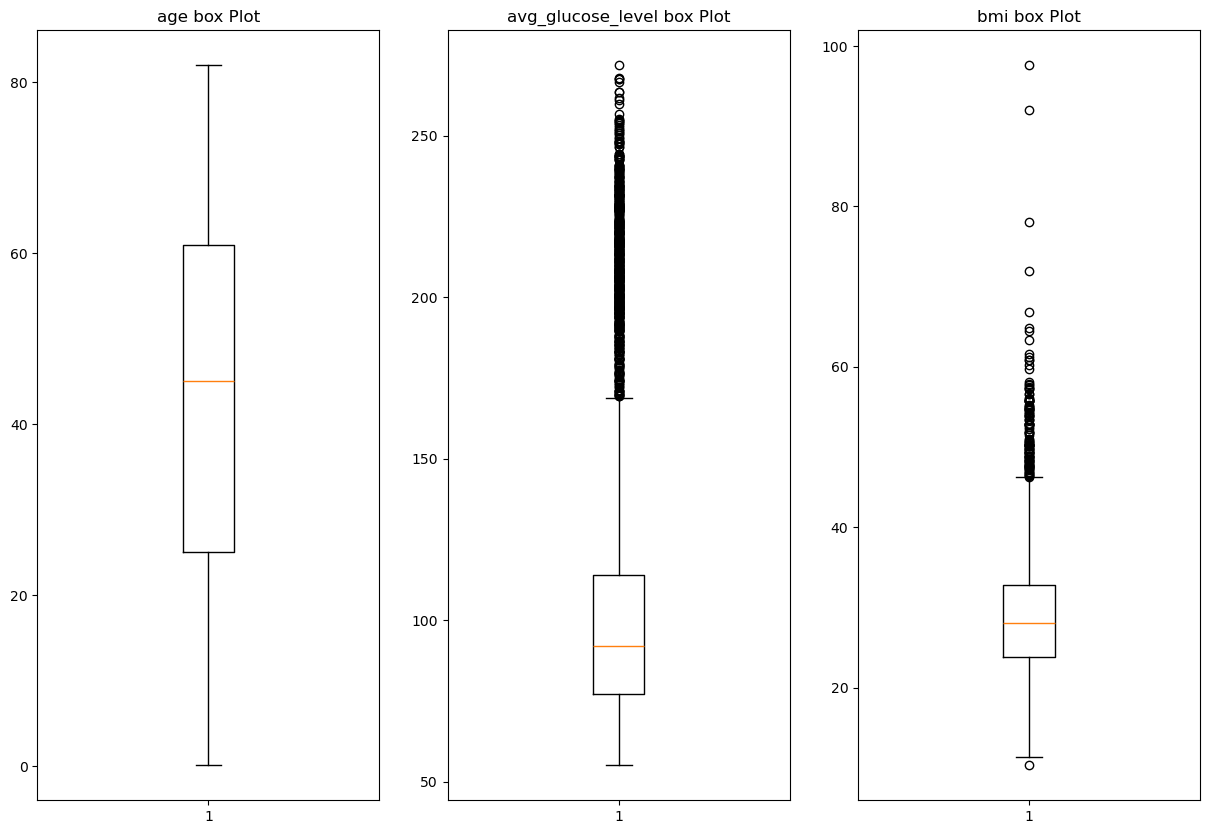

In [17]:
numCols = data.select_dtypes('float64').columns
plt.figure(figsize=(15,10))
for i, col in enumerate(numCols):
    plt.subplot(1, 3, i+1)
    plt.boxplot(data[col])
    plt.title(f"{col} box Plot")

In [18]:
numCols = data.select_dtypes('float64').columns
for col in numCols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    Lf = Q1 - 1.5 * IQR
    Up = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower=Lf, upper=Up)
da=(data['bmi']< Lf)|(data['bmi']> Up) 
da.value_counts()


bmi
False    5110
Name: count, dtype: int64

,count,mean,std,min,25%,50%,75%,max
bmi,5110.0,28.690411,7.120858,10.3,23.8,28.1,32.8,46.3


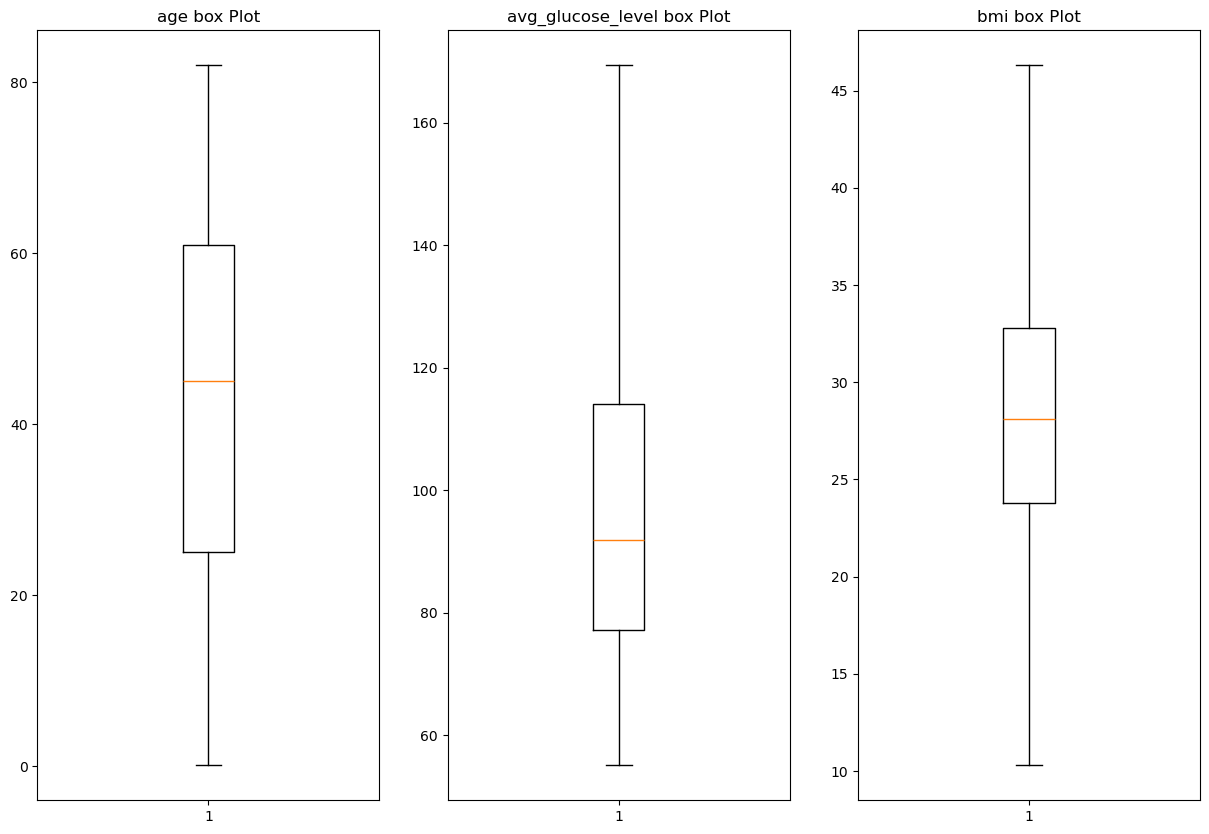

In [19]:
numCols = data.select_dtypes('float64').columns
plt.figure(figsize=(15,10))
for i, col in enumerate(numCols):
    plt.subplot(1, 3, i+1)
    plt.boxplot(data[col])
    plt.title(f"{col} box Plot")
pd.DataFrame(data['bmi']).describe().T

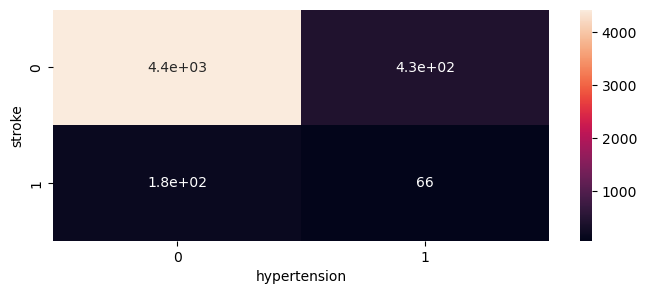

In [20]:
plt.figure(figsize=(8, 3))
agg = data.pivot_table(index='stroke', columns='hypertension', values='gender', aggfunc=len)
sns.heatmap(agg, annot=True)
plt.show()

In [21]:
# One-hot encode the categorical features
data = pd.get_dummies(data, columns=['gender', 'smoking_status', 'work_type'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   age                             5110 non-null   float64 
 1   hypertension                    5110 non-null   category
 2   heart_disease                   5110 non-null   category
 3   ever_married                    5110 non-null   category
 4   Residence_type                  5110 non-null   category
 5   avg_glucose_level               5110 non-null   float64 
 6   bmi                             5110 non-null   float64 
 7   stroke                          5110 non-null   category
 8   gender_Female                   5110 non-null   bool    
 9   gender_Male                     5110 non-null   bool    
 10  smoking_status_Unknown          5110 non-null   bool    
 11  smoking_status_formerly smoked  5110 non-null   bool    
 12  smoking_status_never

In [22]:
data['Residence_type'] = LabelEncoder().fit_transform(data['Residence_type'])
data['ever_married'] = LabelEncoder().fit_transform(data['ever_married'])
data

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,67.0,0,1,1,1,169.3575,36.6,1,False,True,False,True,False,False,False,False,True,False,False
1,61.0,0,0,1,0,169.3575,28.1,1,True,False,False,False,True,False,False,False,False,True,False
2,80.0,0,1,1,0,105.9200,32.5,1,False,True,False,False,True,False,False,False,True,False,False
3,49.0,0,0,1,1,169.3575,34.4,1,True,False,False,False,False,True,False,False,True,False,False
4,79.0,1,0,1,0,169.3575,24.0,1,True,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,1,83.7500,28.1,0,True,False,False,False,True,False,False,False,True,False,False
5106,81.0,0,0,1,1,125.2000,40.0,0,True,False,False,False,True,False,False,False,False,True,False
5107,35.0,0,0,1,0,82.9900,30.6,0,True,False,False,False,True,False,False,False,False,True,False
5108,51.0,0,0,1,0,166.2900,25.6,0,False,True,False,True,False,False,False,False,True,False,False


In [23]:
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese', 'Severely Obese']
data['bmi_category'] = pd.cut(data['bmi'], bins=bmi_bins, labels=bmi_labels)
bins = [0, 18, 35, 50, 65, 100]
labels = ['Child', 'Young Adult', 'Adult', 'Senior', 'Elderly']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)
data


,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,...,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,bmi_category,age_group
0,67.0,0,1,1,1,169.3575,36.6,1,False,True,...,True,False,False,False,False,True,False,False,Severely Obese,Elderly
1,61.0,0,0,1,0,169.3575,28.1,1,True,False,...,False,True,False,False,False,False,True,False,Overweight,Senior
2,80.0,0,1,1,0,105.9200,32.5,1,False,True,...,False,True,False,False,False,True,False,False,Obese,Elderly
3,49.0,0,0,1,1,169.3575,34.4,1,True,False,...,False,False,True,False,False,True,False,False,Obese,Adult
4,79.0,1,0,1,0,169.3575,24.0,1,True,False,...,False,True,False,False,False,False,True,False,Normal,Elderly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,1,83.7500,28.1,0,True,False,...,False,True,False,False,False,True,False,False,Overweight,Elderly
5106,81.0,0,0,1,1,125.2000,40.0,0,True,False,...,False,True,False,False,False,False,True,False,Severely Obese,Elderly
5107,35.0,0,0,1,0,82.9900,30.6,0,True,False,...,False,True,False,False,False,False,True,False,Obese,Young Adult
5108,51.0,0,0,1,0,166.2900,25.6,0,False,True,...,True,False,False,False,False,True,False,False,Overweight,Senior


In [24]:
# Map age_group and bmi_category to consistent numerical values
age_mapping = {'Child': 1, 'Young Adult': 2, 'Adult': 3, 'Senior': 4, 'Elderly': 5}
bmi_mapping = {'Underweight': 1, 'Normal': 2, 'Overweight': 3, 'Obese': 4, 'Severely Obese': 5}
data['age_group'].replace(age_mapping, inplace=True)
data['bmi_category'].replace(bmi_mapping, inplace=True)
data

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,...,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,bmi_category,age_group
0,67.0,0,1,1,1,169.3575,36.6,1,False,True,...,True,False,False,False,False,True,False,False,5,5
1,61.0,0,0,1,0,169.3575,28.1,1,True,False,...,False,True,False,False,False,False,True,False,3,4
2,80.0,0,1,1,0,105.9200,32.5,1,False,True,...,False,True,False,False,False,True,False,False,4,5
3,49.0,0,0,1,1,169.3575,34.4,1,True,False,...,False,False,True,False,False,True,False,False,4,3
4,79.0,1,0,1,0,169.3575,24.0,1,True,False,...,False,True,False,False,False,False,True,False,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,1,83.7500,28.1,0,True,False,...,False,True,False,False,False,True,False,False,3,5
5106,81.0,0,0,1,1,125.2000,40.0,0,True,False,...,False,True,False,False,False,False,True,False,5,5
5107,35.0,0,0,1,0,82.9900,30.6,0,True,False,...,False,True,False,False,False,False,True,False,4,2
5108,51.0,0,0,1,0,166.2900,25.6,0,False,True,...,True,False,False,False,False,True,False,False,3,4


In [25]:
scaler = StandardScaler()
# data[['age']] = scaler.fit_transform(data[['age']])
# pd.DataFrame(data['age'].describe()).T

In [26]:
# plt.figure(figsize=(12, 6))
# sns.histplot(data['age'], kde=True)
# plt.title('Age Distribution after Standardization')
# plt.show()

In [27]:
min_max_scaler = MinMaxScaler()
data[['avg_glucose_level' , 'bmi','age']] = min_max_scaler.fit_transform(data[['avg_glucose_level' , 'bmi','age']])

In [28]:
quantitative = [f for f in data.columns if data.dtypes[f] != 'object']
quantitative_data = data[quantitative]
corr_matrix = quantitative_data.corr()
label= corr_matrix["stroke"]
label.sort_values(ascending=False) # correlation between input features and output y

stroke                            1.000000
age                               0.245257
age_group                         0.240382
heart_disease                     0.134914
hypertension                      0.127904
avg_glucose_level                 0.115652
ever_married                      0.108340
smoking_status_formerly smoked    0.064556
work_type_Self-employed           0.062168
bmi_category                      0.045053
bmi                               0.042700
Residence_type                    0.015458
work_type_Private                 0.011888
gender_Male                       0.009027
smoking_status_smokes             0.008939
work_type_Govt_job                0.002677
smoking_status_never smoked      -0.004129
gender_Female                    -0.009027
work_type_Never_worked           -0.014882
smoking_status_Unknown           -0.055892
work_type_children               -0.083869
Name: stroke, dtype: float64

<Axes: xlabel='stroke', ylabel='count'>

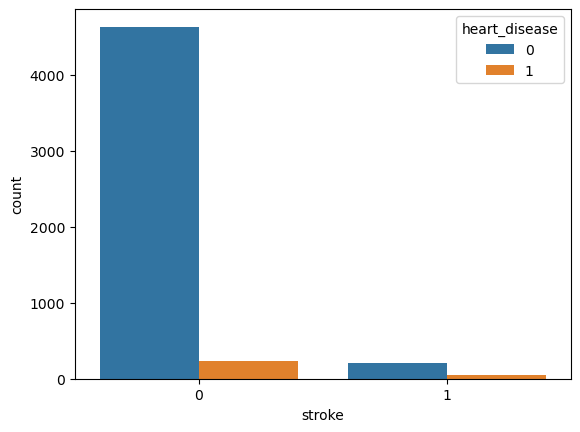

In [29]:
sns.countplot(x='stroke' ,hue='heart_disease' , data =data)

<Axes: xlabel='stroke', ylabel='count'>

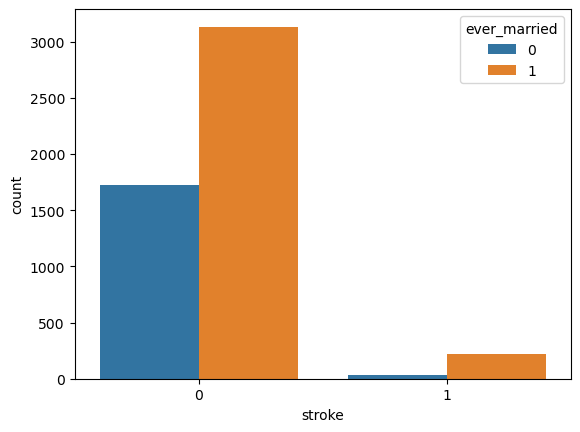

In [30]:
sns.countplot(x='stroke' ,hue='ever_married' , data =data)

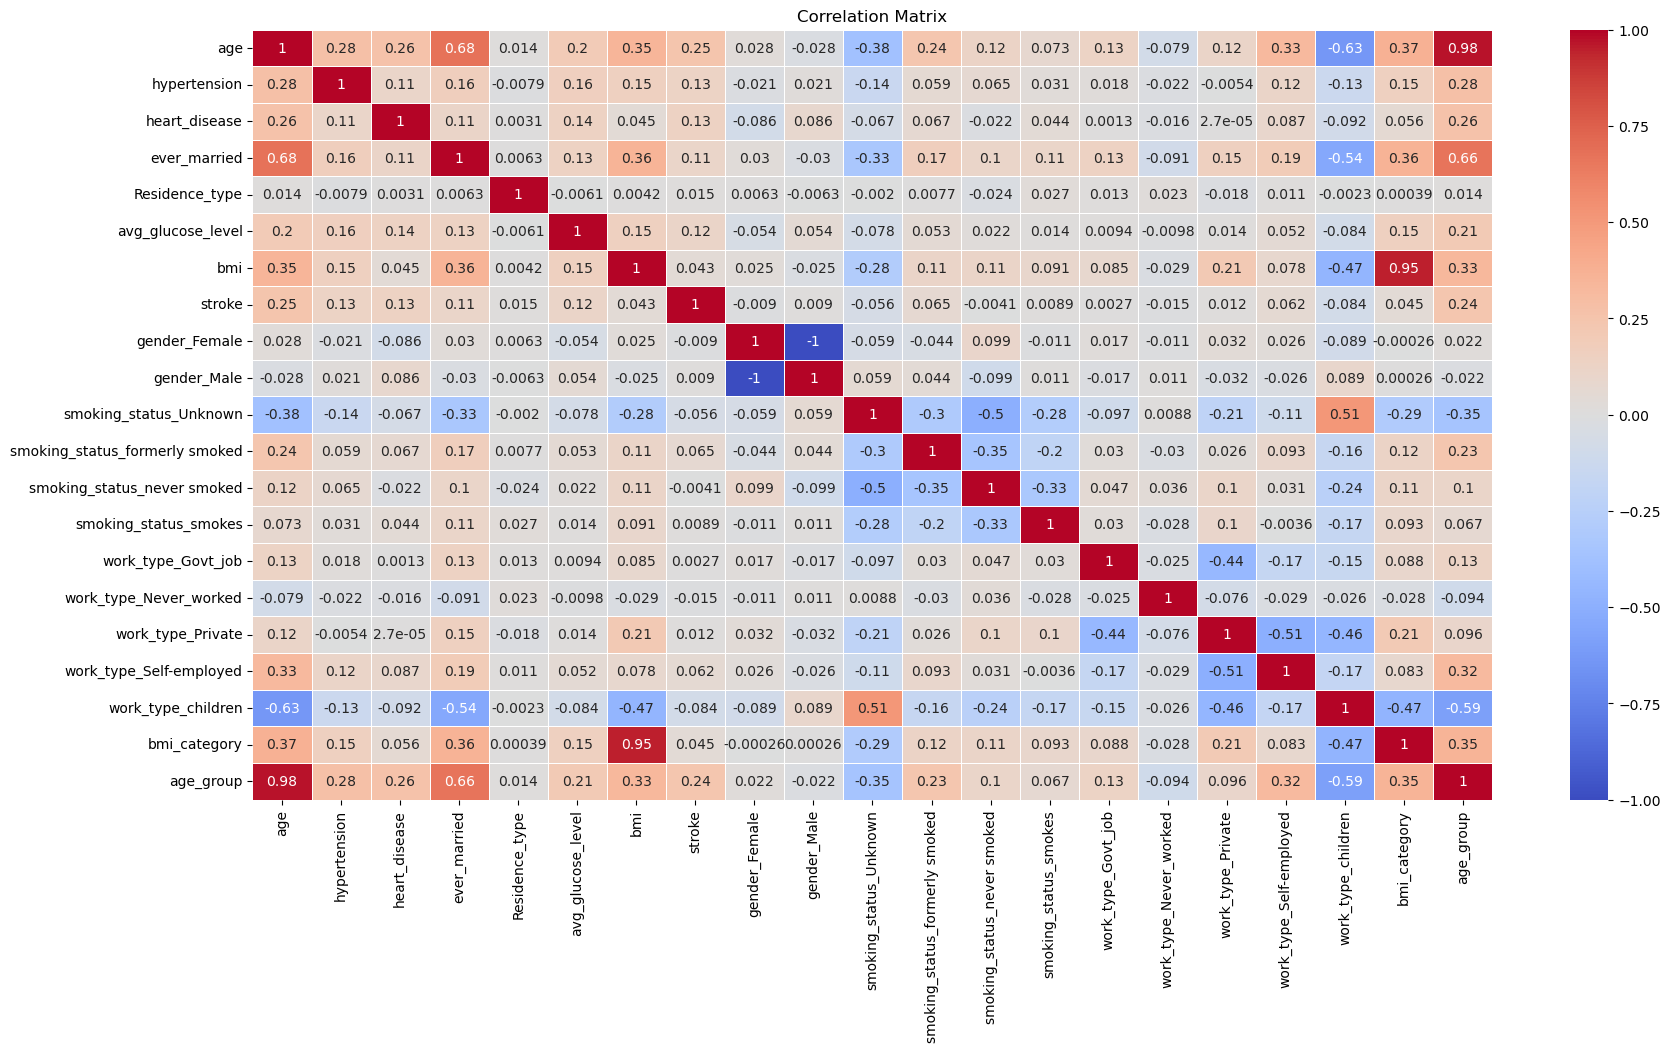

In [31]:
corr_matrix = data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [32]:
from imblearn.over_sampling import RandomOverSampler
ov=RandomOverSampler(sampling_strategy='minority')
X = data.drop(columns=['stroke'])
y = data['stroke']
X_ov , y_ov = ov.fit_resample(X,y) 


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_ov, y_ov, test_size=0.2, random_state=42)

In [34]:
print(f'Shope of X train data:\n{X_train.shape}')
print(f'Shope of y train data:\n{y_train.shape}')
print(f'Shope of X test data:\n{X_test.shape}')
print(f'Shope of y test data:\n{y_test.shape}')

Shope of X train data:
(7777, 20)
Shope of y train data:
(7777,)
Shope of X test data:
(1945, 20)
Shope of y test data:
(1945,)


In [35]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[717 258]
 [194 776]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       975
           1       0.75      0.80      0.77       970

    accuracy                           0.77      1945
   macro avg       0.77      0.77      0.77      1945
weighted avg       0.77      0.77      0.77      1945



In [37]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import RandomizedSearchCV 
# Create the classifier object 
rf_clf = RandomForestClassifier(n_estimators = 10, random_state=4) 
# Train the model using the training sets
rf_clf.fit(X_train, y_train) 
# performing predictions on the test dataset 
y_pred_rf = rf_clf.predict(X_test) 
# Printing accuracy of the model
print('Accuracy:', accuracy_score(y_test, y_pred_rf))

Accuracy: 0.990745501285347


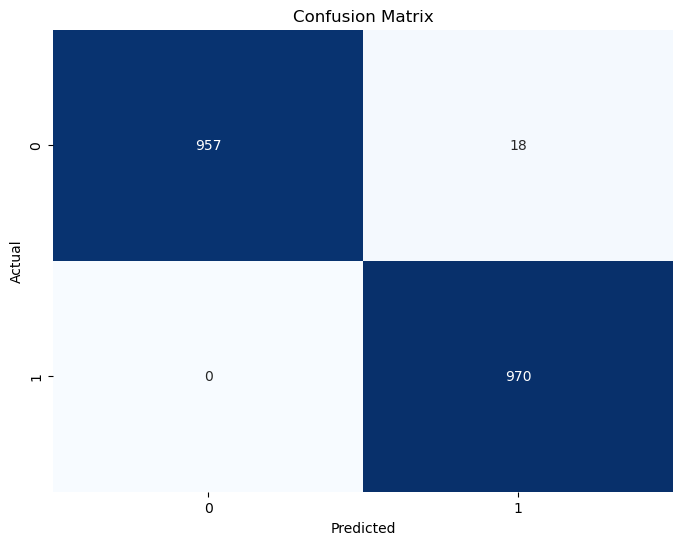

In [38]:
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support 
cm2 = confusion_matrix(y_test,y_pred_rf)
# Plot confusion matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.title('Confusion Matrix') 
plt.show()

In [39]:
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       975
           1       0.98      1.00      0.99       970

    accuracy                           0.99      1945
   macro avg       0.99      0.99      0.99      1945
weighted avg       0.99      0.99      0.99      1945



In [40]:
from sklearn.ensemble import StackingClassifier

# Create a stacking model
stacking_model = StackingClassifier(
    estimators=[('logreg', model), ('rf', rf_clf)],
    final_estimator=LogisticRegression()
)

# Fit the stacking model
stacking_model.fit(X_train, y_train)

# Predictions
y_pred_stacking = stacking_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stacking))
print("\nClassification Report:\n", classification_report(y_test, y_pred_stacking))


Confusion Matrix:
 [[972   3]
 [  0 970]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       975
           1       1.00      1.00      1.00       970

    accuracy                           1.00      1945
   macro avg       1.00      1.00      1.00      1945
weighted avg       1.00      1.00      1.00      1945



In [42]:
data.columns

Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke', 'gender_Female',
       'gender_Male', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'bmi_category', 'age_group'],
      dtype='object')

In [50]:
import joblib
joblib.dump(stacking_model, 'diabetes_model.pkl')

['diabetes_model.pkl']

In [52]:
import gradio as gr
import joblib
import numpy as np

# Function to calculate BMI category
def calculate_bmi_category(bmi):
    if bmi < 18.5:
        return 1  # Underweight
    elif 18.5 <= bmi < 24.9:
        return 2  # Normal
    elif 25 <= bmi < 29.9:
        return 3  # Overweight
    elif 30 <= bmi < 34.9:
        return 4  # Obese
    else:
        return 5  # Severely Obese

# Function to calculate age group
def calculate_age_group(age):
    if age < 18:
        return 1  # Child
    elif 18 <= age < 35:
        return 2  # Young Adult
    elif 35 <= age < 55:
        return 3  # Adult
    elif 55 <= age < 75:
        return 4  # Senior
    else:
        return 5  # Elderly

# Define a function to preprocess the inputs and predict stroke
def predict_stroke(gender, age, hypertension, heart_disease, marital_status, work_type,
                   residence_type, avg_glucose_level, bmi, smoking_status):
    
    # Convert categorical inputs to numeric
    hypertension = 1 if hypertension else 0
    heart_disease = 1 if heart_disease else 0
    marital_status = 1 if marital_status == "Yes" else 0
    
    # Automatically compute BMI Category and Age Group
    bmi_category = calculate_bmi_category(bmi)
    age_group = calculate_age_group(age)
    
    # One-hot encode gender
    gender_Female = 1 if gender == "Female" else 0
    gender_Male = 1 if gender == "Male" else 0
    
    # One-hot encode work type
    work_type_Govt_job = 1 if work_type == "Govt-job" else 0
    work_type_Never_worked = 1 if work_type == "Never worked" else 0
    work_type_Private = 1 if work_type == "Private" else 0
    work_type_Self_employed = 1 if work_type == "Self-employed" else 0
    work_type_children = 1 if work_type == "Children" else 0
    
    # One-hot encode smoking status
    smoking_status_Unknown = 1 if smoking_status == "Unknown" else 0
    smoking_status_formerly_smoked = 1 if smoking_status == "Formerly smoked" else 0
    smoking_status_never_smoked = 1 if smoking_status == "Never smoked" else 0
    smoking_status_smokes = 1 if smoking_status == "Smokes" else 0
    
    # Encode residence type
    residence_type_Urban = 1 if residence_type == "Urban" else 0
    residence_type_Rural = 1 if residence_type == "Rural" else 0
    
    # Scale the numerical features together using MinMaxScaler for 'age', 'avg_glucose_level', and 'bmi'
    try:
        scaled_values = min_max_scaler.transform([[age, avg_glucose_level, bmi]])
        age_scaled, avg_glucose_level_scaled, bmi_scaled = scaled_values[0]
    except Exception as e:
        return f"Error in scaling: {str(e)}"
    
    # Combine all inputs into an array
    try:
        input_data = np.array([[age_scaled, hypertension, heart_disease, marital_status, 
                                residence_type_Urban, avg_glucose_level_scaled, bmi_scaled, 
                                gender_Female, gender_Male, smoking_status_Unknown, 
                                smoking_status_formerly_smoked, smoking_status_never_smoked, 
                                smoking_status_smokes, work_type_Govt_job, work_type_Never_worked,
                                work_type_Private, work_type_Self_employed, work_type_children,
                                bmi_category, age_group]])
    except ValueError as e:
        return f"Error in input conversion: {str(e)}"
    
    # Print the input data to check if it looks correct
    print("Input Data for Prediction:", input_data)
    
    # Check if input shape matches what the model expects
    try:
        probabilities = stacking_model.predict_proba(input_data)
               
        # Check the shape of the probabilities
        print("Shape of probabilities:", probabilities.shape)
        
        # Ensure that we access the right index
        if probabilities.shape[1] == 2:  # Check if it is binary classification
            prediction = (probabilities[0][1] > 0.0001).astype(int)  # Probability of 'Stroke'
        else:
            return "Model output is not binary."

        return "Stroke" if prediction == 1 else "No Stroke"
    except Exception as e:
        return f"Error during prediction: {str(e)}"


# Define Gradio components for inputs and outputs
inputs = [
    gr.Radio(choices=['Male', 'Female'], label="Gender"),
    gr.Slider(0, 100, label="Age"),
    gr.Checkbox(label="Hypertension"),
    gr.Checkbox(label="Heart Disease"),
    gr.Radio(choices=['Yes', 'No'], label="Ever Married"),
    gr.Dropdown(label="Work Type", choices=["Private", "Self-employed", "Govt-job", "Children", "Never worked"]),
    gr.Radio(label="Residence Type", choices=["Urban", "Rural"]),
    gr.Slider(30, 300, label="Average Glucose Level"),
    gr.Slider(5, 45, label="BMI"),
    gr.Dropdown(label="Smoking Status", choices=["Never smoked", "Formerly smoked", "Smokes", "Unknown"])
]

output = gr.Textbox(label="Prediction")

# Create Gradio interface
gr.Interface(fn=predict_stroke, inputs=inputs, outputs=output, title="Stroke Prediction",
             description="Enter patient details to predict the risk of stroke.").launch()
from collections import Counter
print("Original class distribution:", Counter(y_ov))


* Running on local URL:  http://127.0.0.1:7872

To create a public link, set `share=True` in `launch()`.


Original class distribution: Counter({1: 4861, 0: 4861})
